In [1]:
# Importing libraries
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Loading Data
def load_data(path):
    """
    Load data from path
    Arguments:
        path (str): csv data path
    Return:
        CSV data loaded from path as dataframe
    """
    return pd.read_csv(path)

In [3]:
data = load_data('data.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [5]:
# Languages counts
def langauge_sentence_counts():
    """
        Get every language and number of sentences
        Return:
            a two-columns dataframe conatin each langauge and number of sentences in that langauge
    """
    return pd.DataFrame(data['Language'].value_counts())

langauge_sentence_counts()

,Language
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546
Arabic,536


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
def split_XY(data):
    """
    Split data to sentences and labels
    Arguments:
        Data (dataframe): data to split
    Return
        Tuple (sentences, labels)
    """
    return data['Text'], data['Language']

sentences, labels = split_XY(data)

In [8]:
# Explore some sentences
def explore_data(sentences, labels, n):
    """
    Explore some random sentence from data
    Arguments:
        sentences(series, list): all sentences
        labels(series, list): language in which sentences were written
        n(int): number of sentences to print 
    """
    indecies_list = random.sample(range(0, len(sentences)), n)

    for idx in indecies_list:
        print('Text:', sentences[idx])
        print('Langauge:', labels[idx])
        print('--------------------------------------------------------------------------------------------------------------')\

explore_data(sentences, labels, 10)

Text: con la sua unica figlia narcisa marion era estremamente umile e dolce narcisa invece era completamente l'opposto vedi lei era bellissima oltre le parole lei era come una vivente.
Langauge: Italian
--------------------------------------------------------------------------------------------------------------
Text: Eu não me importo se alguém está perguntando algo e esta é uma decisão muito fácil para você, como se alguém dissesse para você pegar meu 1 milhão de dólares e você dissesse que isso é um acéfalo.
Langauge: Portugeese
--------------------------------------------------------------------------------------------------------------
Text: e lo faccio sempre tu puoi dire dita incrociate e tu incroci le dita in quel modo.
Langauge: Italian
--------------------------------------------------------------------------------------------------------------
Text: Bidrag angives med IP-adressen.
Langauge: Danish
------------------------------------------------------------------------------

In [9]:
# Clear sentences
def clear_sentences(sentences):
    """
    Clear symbols, numbers and single letters from sentences
    Arguments:
        sentences(series, list): sentences to clear
    Return:
        new_sentences(list): cleared sentences
    """
    new_sentences = []
    for sentence in sentences:
        # removing symbols and numbers
        sentence = re.sub(r'[!@#.$(),n"%^*?:;~`0-9]', ' ', sentence)
        sentence = re.sub(r'[[]]', ' ', sentence)

        # removing single letters
        sentence = ' '.join( [w for w in sentence.split() if len(w)>1] )

        # conver to lower case
        sentence = sentence.lower()

        # append to new texts
        new_sentences.append(sentence)
    
    return new_sentences

cleared_sentences = clear_sentences(sentences)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Possible nested set at position 1
  


In [10]:
# EXPLORE SENTENCES AFTER CLEAR
explore_data(cleared_sentences, labels, 10)

Text: நான் வேலை செய்வேன் என்று நேர்மையாக நினைக்கவில்லை
Langauge: Tamil
--------------------------------------------------------------------------------------------------------------
Text: lä kar mella språkversio er språklä kar eller terwikilä kar lagras seda ce tralt på database wikidata istället för att läggas med wikikod varje språkversio av varje artikel
Langauge: Sweedish
--------------------------------------------------------------------------------------------------------------
Text: l'appre dime to automatico la statistica so discipli strettame te collegate
Langauge: Italian
--------------------------------------------------------------------------------------------------------------
Text: википедия настоящее время работает на выделенных кластерах серверов li ux основном ubu tu[ ][ несколькими машинами ope solaris для zfs
Langauge: Russian
--------------------------------------------------------------------------------------------------------------
Text: யாரோ ஒருவர் தனது கனவுக

In [11]:
# Get longest sentence length 
def get_longest_length(sentences):
    """
    Get longest length of list of sentence
    Arguments:
        sentences (list): Sentences to get longest one length
    Return
        longest_len (int): Longest sentence length 
    """
    longest_len = 0
    for text in sentences:
        longest_len = max(longest_len, len(text.split()))
    return longest_len

max_len = get_longest_length(cleared_sentences)
max_len

3329

In [12]:
# Split Data
train_sentences, valid_sentences, train_labels, valid_labels = train_test_split(cleared_sentences,
                                                                                labels,
                                                                                test_size = 0.20)

In [13]:
# Labels one hot encoding
def onehot(labels):
    """
    One hot encode labels to be ready for training
    Arguments:
        labels(list, series): labels to encode
    Return:
        Labels after encoding
    """
    label_encoder = LabelEncoder()
    vec = label_encoder.fit_transform(labels)
    return to_categorical(vec)

# Encode both validation and training labels
train_labels = onehot(train_labels)
valid_labels = onehot(valid_labels)

In [14]:
# Create a tokenizer
tokenizer = Tokenizer()

# Fit texts
tokenizer.fit_on_texts(train_sentences)

# word index
word_index = tokenizer.word_index

# total words
total_words = len(word_index) + 1

# print(word_index)
# print(total_words)

# convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)

# padded sequences
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_len, padding='post', truncating='post')  

In [15]:
# LSTM model
def LSTM_model(units, emb_dim, dropout):
    """
        LSTM Model
        Arguments:
            units(int): number of LSTM units
            emb_dim(int): number of embedding dimention to represent a word
            dropout(float): droput ratio 
        Return
            LSTM model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, emb_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(17, activation='softmax')
    ])
    return model

In [16]:
# GRU Model
def GRU_model(units, emb_dim, dropout):
    """
        GRU Model
        Arguments:
            units(int): number of GRU units
            emb_dim(int): number of embedding dimention to represent a word
            dropout(float): droput ratio 
        Return
            GRU model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, emb_dim, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(17, activation='softmax')
    ])
    return model

In [17]:
# CONV Model
def CONV_model(units, emb_dim, dropout):
    """
        Try using a convelution layer instead of RNN
        Arguments:
            units(int): number of Conv units
            emb_dim(int): number of embedding dimention to represent a word
            dropout(float): droput ratio 
        Return
            GRU model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, emb_dim, input_length=max_len),
        tf.keras.layers.Conv1D(units, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(17, activation='softmax')
    ])
    return model

In [18]:
def compile_and_fit(model, optimizer, num_epochs):
    """
    Compile and fit model
    Arguments:
        model(func): which model ?
        optimizer(str): which optimizer ?
        num_epochs: number of epochs
    """
    # show model summary
    model.summary()

    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    history = model.fit(
        train_padded,
        train_labels,
        epochs=num_epochs,
        validation_data=(valid_padded, valid_labels),
        verbose = 1
    )

    return history

In [19]:
def plot_graphs(history):
    """
    Plot accuracy and loss graph
    Arguments:
        History: model history
    """

    # ACCURACY
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])

    # Show figure
    plt.show()

    # LOSS
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'])

    # Show figure
    plt.show()

In [108]:
def plot_confusion_matrix(model):
  """
  Show the confusion matrix
  Arguments:
    model: model to show predicted values as heatmap
  """
  # real labels
  y = np.argmax(valid_labels, axis=1)

  # predicted values
  y_pred = model.predict(valid_padded)
  y_pred = np.argmax(y_pred, axis=1)

  # confusion matrix
  cm = tf.math.confusion_matrix(y, y_pred)

  # get list of langauges name in order
  label_encoder = LabelEncoder()
  vec = label_encoder.fit_transform(labels)
  dic = dict(zip(vec, labels))
  l = []
  for i in range(17):
    l.append(dic[i])

  # plot confusion matrix
  plt.figure(figsize=(20,20))
  sns.heatmap(cm, annot = True)
  loc = np.array(range(17)) +.5
  plt.xticks(loc, l)
  plt.yticks(loc, l)
  plt.show()

In [22]:
# TRY LSTM
lstm = LSTM_model(128, 32, .2)
lstm_history = compile_and_fit(lstm, 'adam', 20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3329, 32)          1213856   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              164864    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 17)                561       
                                                                 
Total params: 1,387,505
Trainable params: 1,387,505
Non-trainable params: 0
____________________________________________

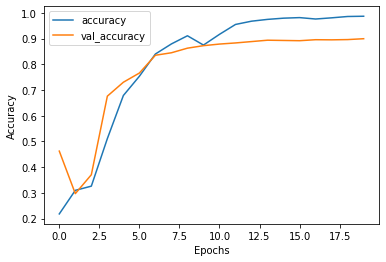

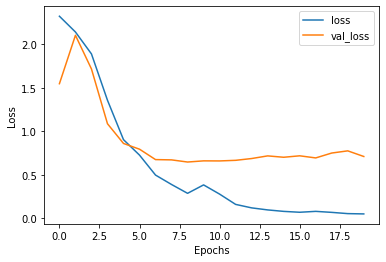

In [23]:
# plot LSTM model graph
plot_graphs(lstm_history)

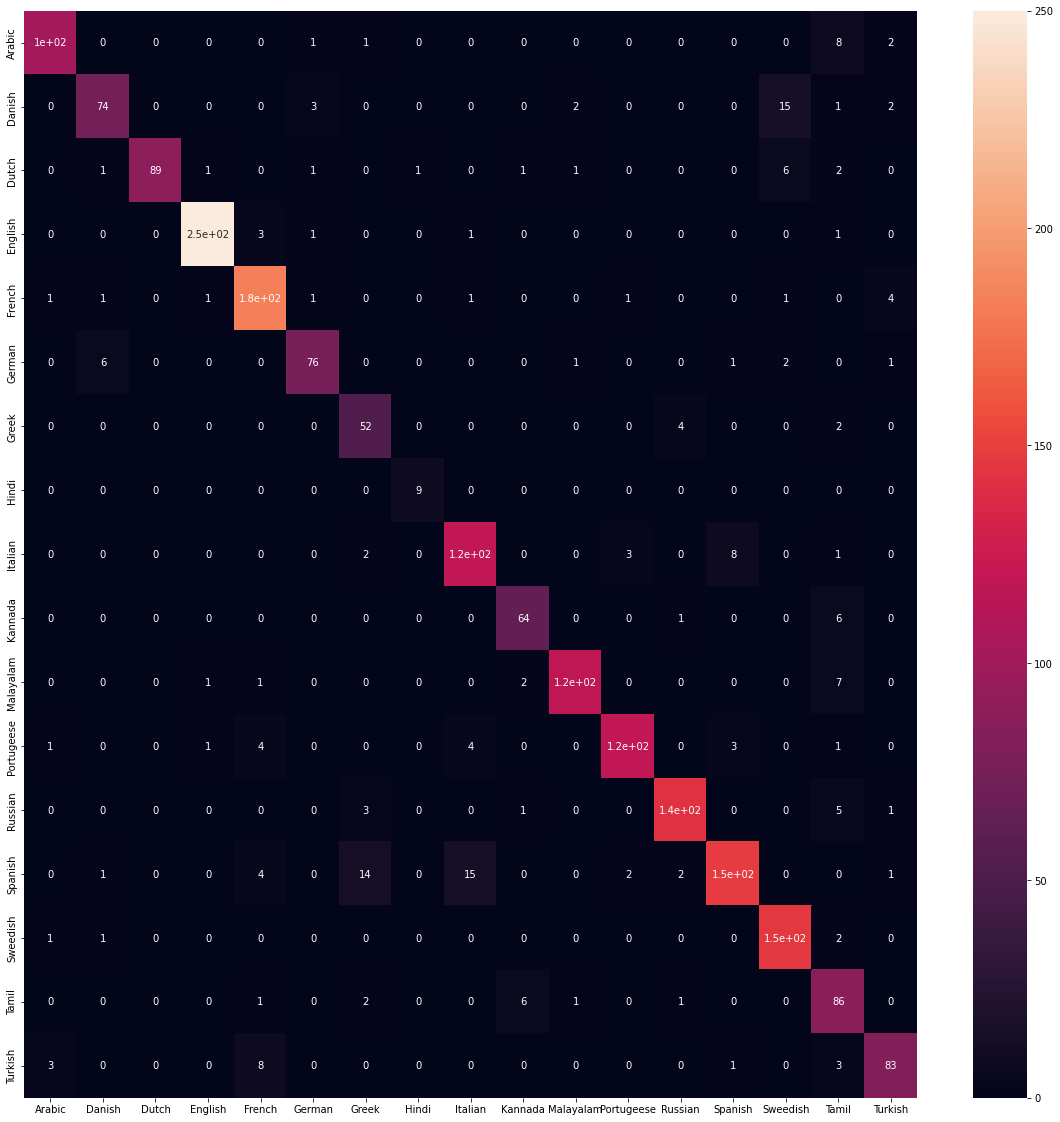

In [109]:
# Plot Confusion matrix
plot_confusion_matrix(lstm)

In [20]:
# TRY GRU
gru = GRU_model(64, 32, .2)
gru_history = compile_and_fit(gru, 'adam', 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3329, 32)          1213856   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              37632     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 17)                561       
                                                                 
Total params: 1,256,177
Trainable params: 1,256,177
Non-trainable params: 0
______________________________________________

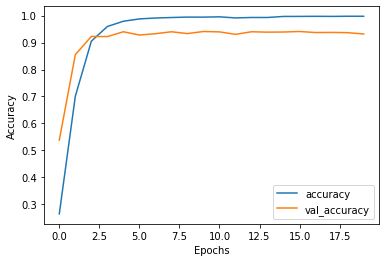

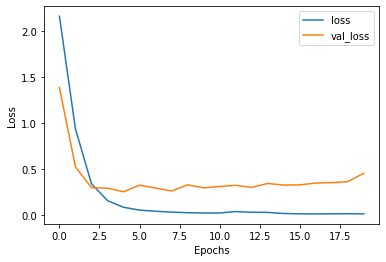

In [21]:
# plot GRU model graphs
plot_graphs(gru_history)

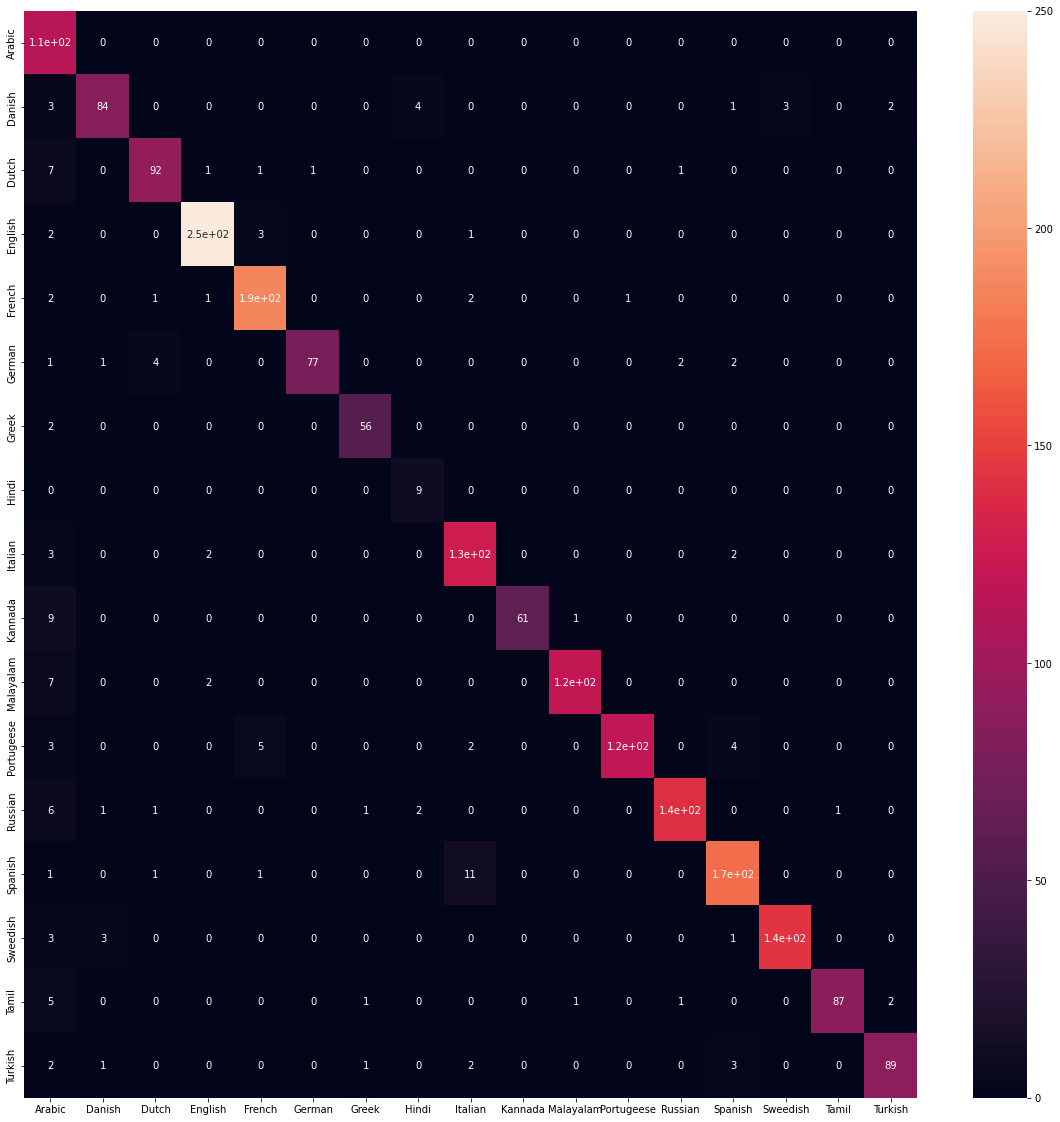

In [110]:
# Plot Confusion matrix
plot_confusion_matrix(gru)

In [24]:
# TRY CONV
conv = CONV_model(128, 32, .2)
conv_history = compile_and_fit(conv, 'adam', 10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3329, 32)          1213856   
                                                                 
 conv1d (Conv1D)             (None, 3325, 128)         20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 17)                561       
                                                      

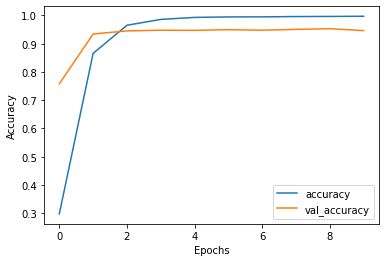

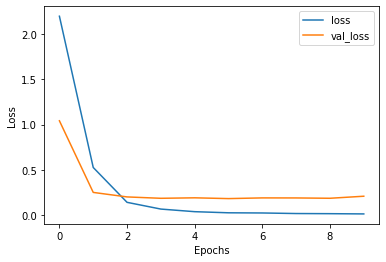

In [25]:
# Plot Covn model graphs
plot_graphs(conv_history)

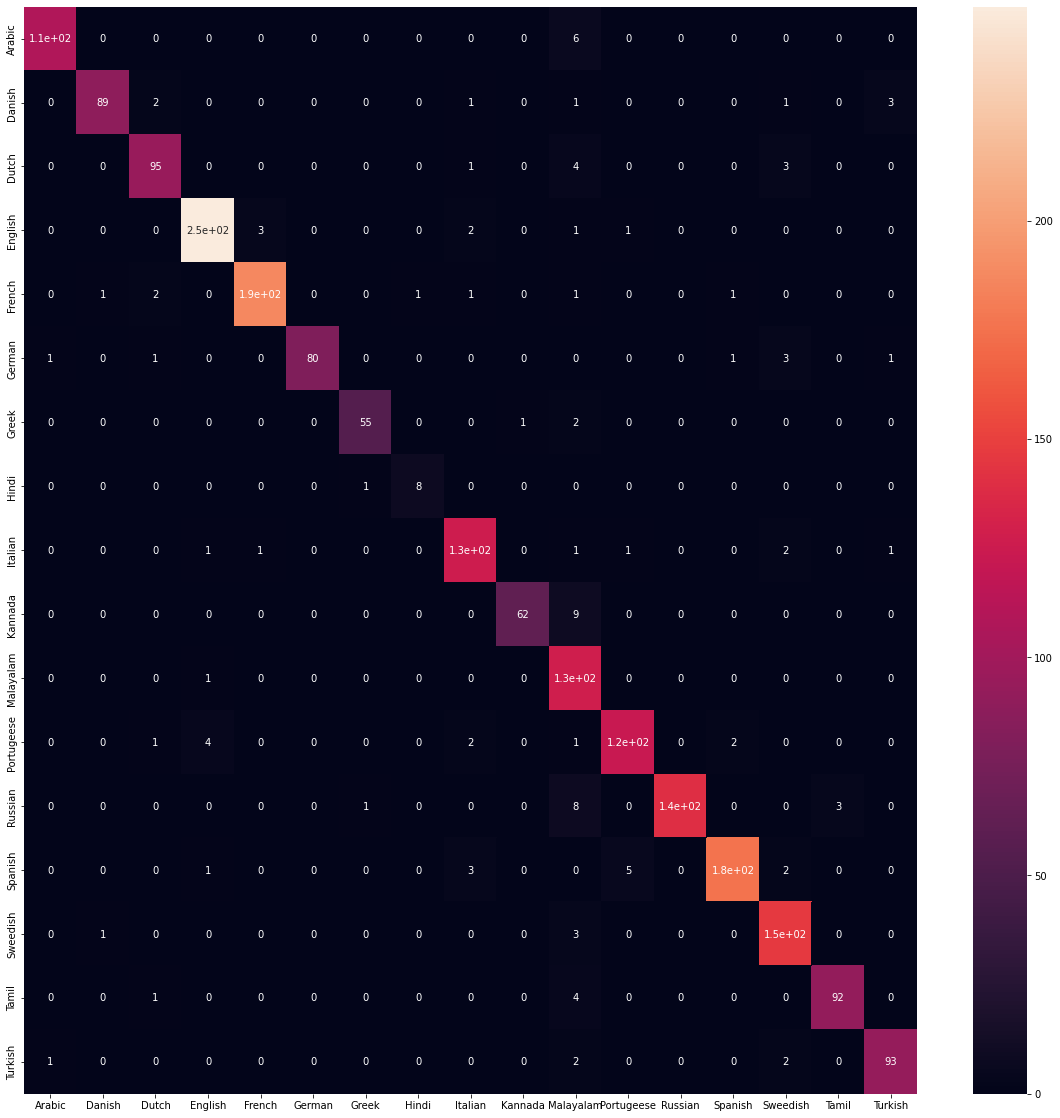

In [111]:
# Plot Confusion matrix
plot_confusion_matrix(conv)

In [27]:
# Save models
conv.save('LSTM.h5')
gru.save('GRU.h5')
lstm.save('Conv.h5')

In [112]:
# Download files
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('LSTM.h5')
    files.download('GRU.h5')
    files.download('Conv.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# saving embedding vectors to visualize using embedding projector
e = gru.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for word_num in range(1, weights.shape[0]):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

In [ ]:
# Download files
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>